# Regression

## Initial set up

In [2]:
# import libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the dataset
Working with [Real State Price Prediction dataset](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction)

In [9]:
dataset_dir = "data"
dataset_file = "real_estate.csv"
housing_df = pd.read_csv("data/real_estate.cvs")

housing_df.head()

No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

## Exploring and preprocessing

In [10]:
housing_df.shape

(414, 8)

In [11]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


The last feature (House Price in Unit Area) is the one we will try to predict with LR

In [12]:
# drop non-useful columns
housing_df.drop('No', axis=1, inplace=True)
housing_df.shape

(414, 7)

In [13]:
# compute feature stats
housing_df.describe()

X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148971     17.712560   
std               0.281967     11.392485   
min            2012.667000      0.000000   
25%            2012.917000      9.025000   
50%            2013.167000     16.100000   
75%            2013.417000     28.150000   
max            2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

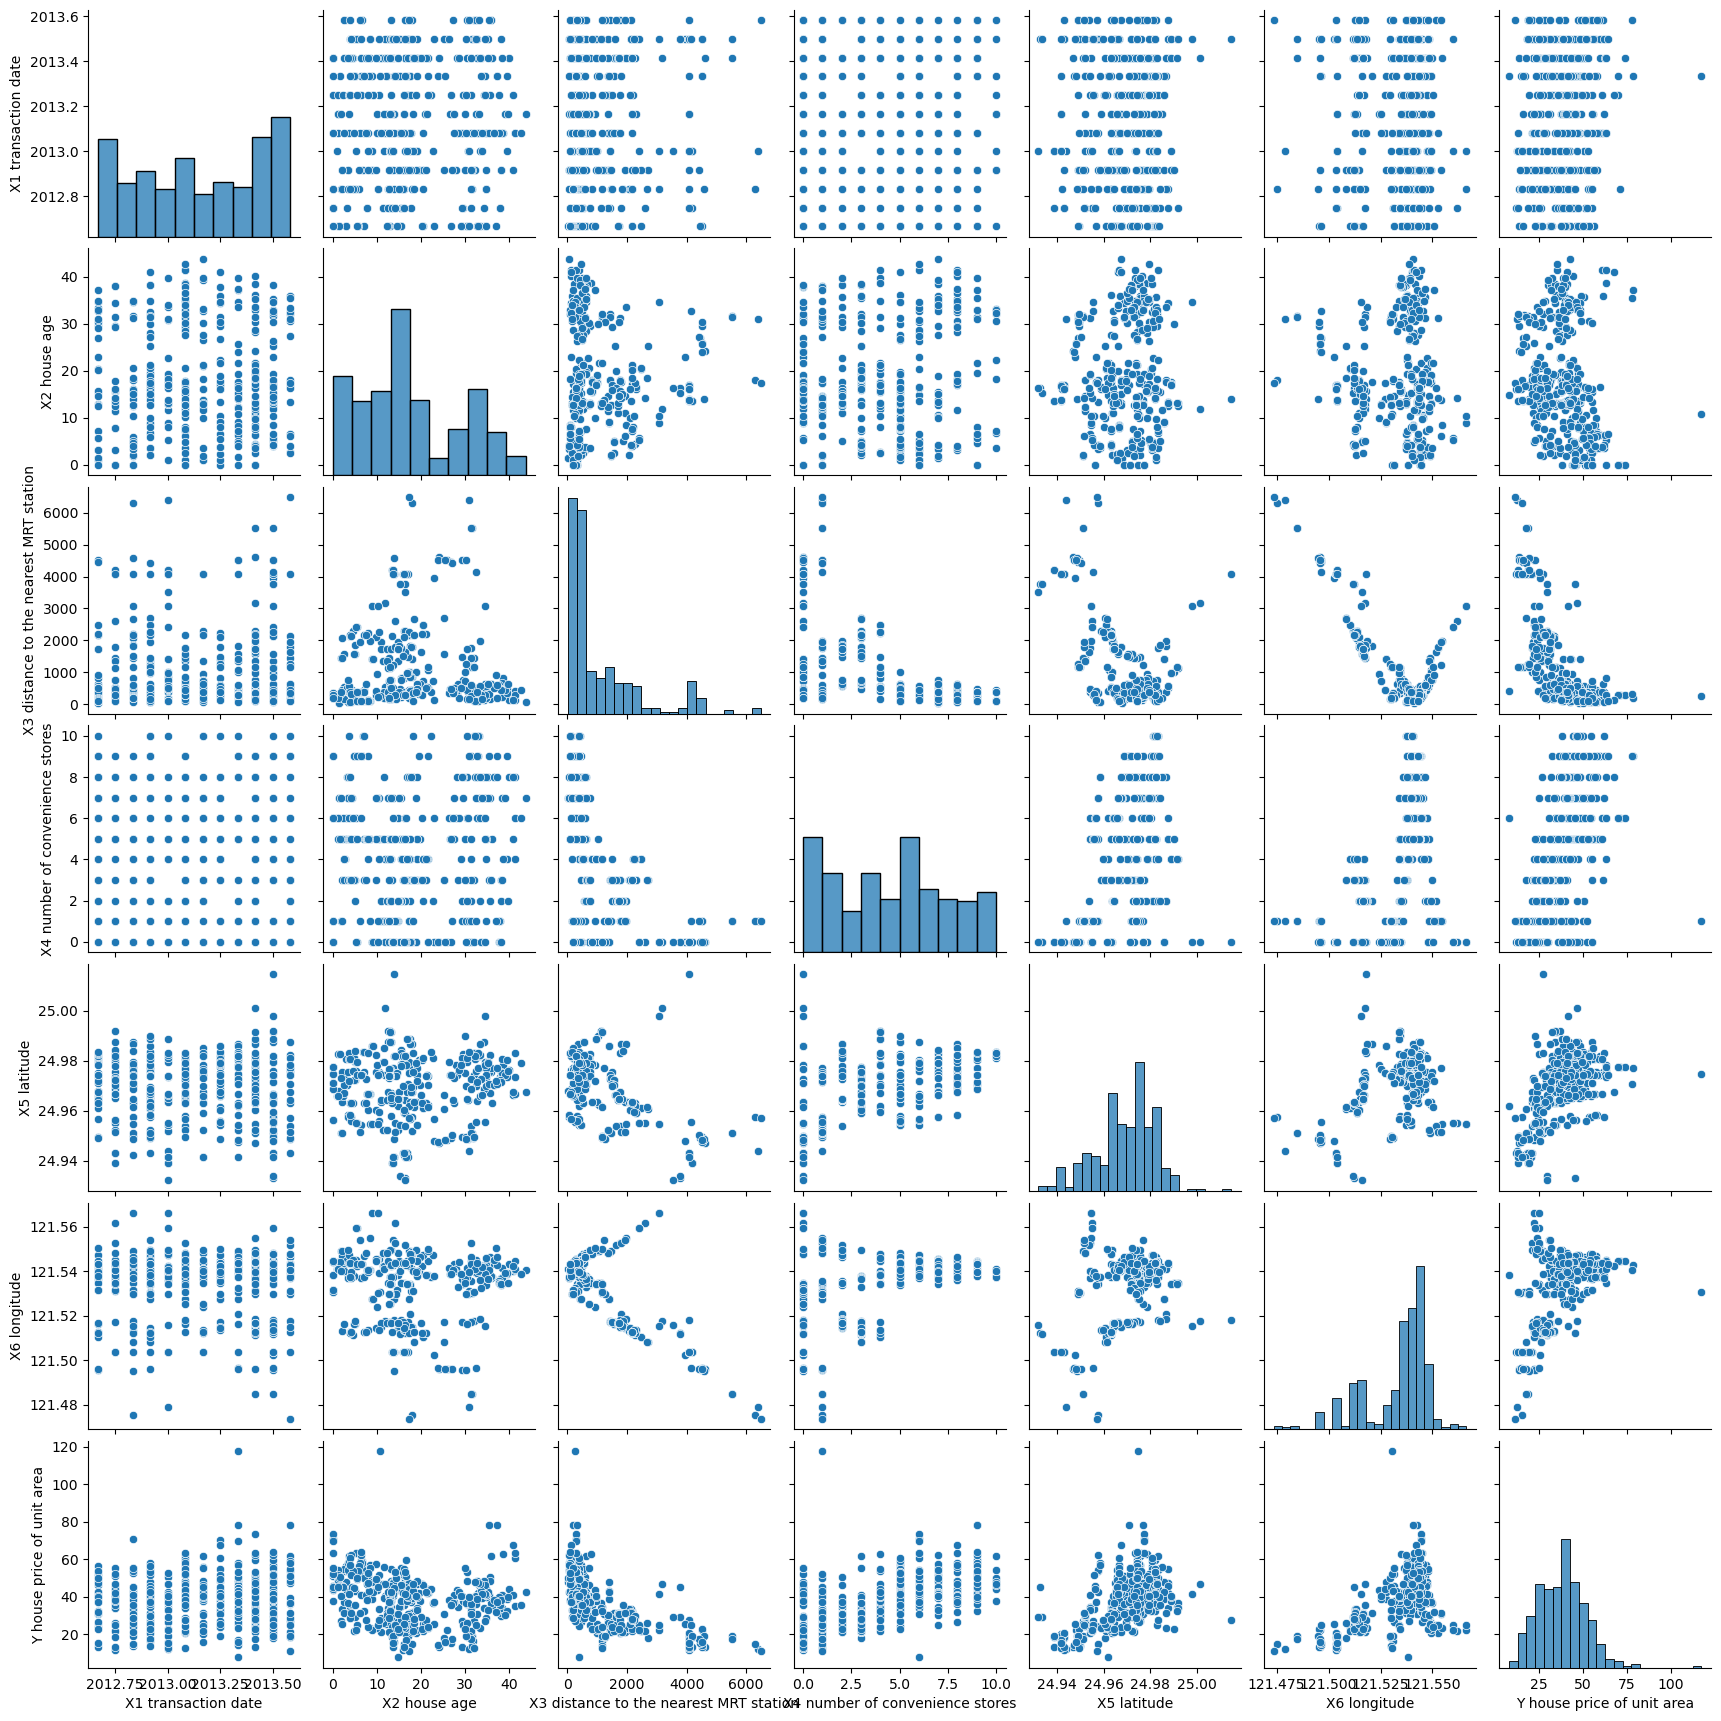

In [14]:
# explore feature distributions
sns.pairplot(housing_df)

<Axes: >

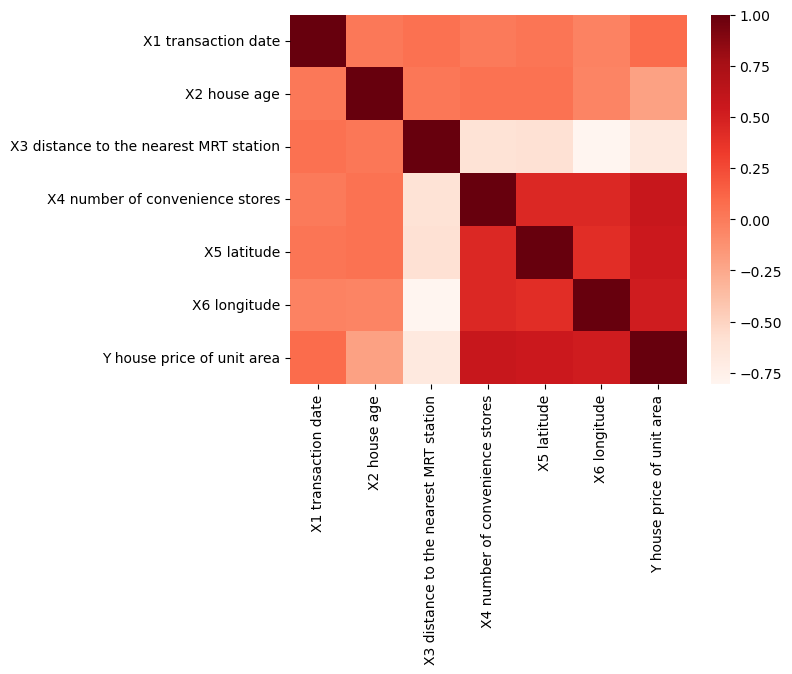

In [15]:
# check feature correlations
sns.heatmap(housing_df.corr(), cmap="Reds")

The "latitude", "longitude", and "number of convenience stores" features are positively correlated to house price, making them good candidates for linear regression.

In [16]:
# Look for missing values
housing_df[housing_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [X1 transaction date, X2 house age, X3 distance to the nearest MRT station, X4 number of convenience stores, X5 latitude, X6 longitude, Y house price of unit area]
Index: []

Fortunately there are no missing values in the dataset.

## Data Split

In [19]:
# before dividing the dataset into training and test sets, split the features from the labels
X = housing_df.drop("Y house price of unit area", axis=1)
y = housing_df["Y house price of unit area"]
print(f'features shape = {X.shape}')
print(f'labels shape = {y.shape}')

features shape = (414, 6)
labels shape = (414,)


In [20]:
# Create the train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size= 0.2, random_state=12345)
print(f'X train shape = {X_train.shape}')
print(f'X test shape = {X_test.shape}')

X train shape = (331, 6)
X test shape = (83, 6)


## Single Feature Linear Regression

Define the linear regression model

In [21]:
#    model family         actual model (estimator)
from sklearn.linear_model import LinearRegression

In [22]:
# instantiating the model
lr_model = LinearRegression()

First try working with a single feature

In [23]:
# leverge the 'latitude' feature
lat_train = X_train[['X5 latitude']]
lat_test = X_test[['X5 latitude']]

In [25]:
type(lat_train)

pandas.core.frame.DataFrame

In [27]:
type(X_train['X5 latitude'])

pandas.core.series.Series

In [28]:
# fit the model to the data
lr_model.fit(lat_train, y_train)

LinearRegression()

In [29]:
lr_model.coef_

array([630.53418345])

In [30]:
lr_model.intercept_

-15705.662374382438

In [32]:
y_pred = lr_model.predict(lat_test)

In [33]:
y_pred

array([31.43676858, 41.4181247 , 36.72064504, 44.854536  , 41.1154683 ,
       43.4673608 , 30.06220406, 34.35614185, 36.85936256, 45.82555865,
       38.0258508 , 46.3615127 , 34.72185168, 42.75485717, 28.84527309,
       43.4673608 , 21.7328475 , 43.20884179, 46.56958898, 44.06006293,
       41.4181247 , 29.70910492, 35.06864548, 27.13022011, 43.47997148,
       45.66161976, 46.68308514, 41.22265911, 19.13504666, 48.66926781,
       20.83748896, 43.33494862, 41.50639949, 37.33856854, 29.28664701,
       34.3939739 , 32.735669  , 28.84527309, 46.3615127 , 66.89170572,
       36.72064504, 46.3615127 , 34.45072198, 39.74090378, 35.28933244,
       24.17301479, 36.29188179, 32.74827968, 45.85708536, 40.04356018,
       44.62123836, 41.29832321, 35.39652325, 37.10527089, 52.37050347,
       50.57978639, 34.50116471, 29.90457051, 44.10420033, 46.85332937,
       20.83748896, 25.96373187, 39.46977408, 40.03725484, 27.45179254,
       36.27927111, 42.16846038, 47.64780244, 20.83748896, 37.19

In [34]:
from sklearn import metrics

In [36]:
# Mean Squared Error
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

140.31639479244004


In [37]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"RMSE = {rmse}")

RMSE = 11.84552214097969


In [38]:
# Look at the label column
housing_df['Y house price of unit area'].describe()

count    414.000000
mean      37.980193
std       13.606488
min        7.600000
25%       27.700000
50%       38.450000
75%       46.600000
max      117.500000
Name: Y house price of unit area, dtype: float64

The price ranges from [7.6 -117] and the SD from the mean is 13.6.
The RMSE value obtained by the model is below 1 SD so it could be acceptable.

In [41]:
# look at the residuals from each prediction
test_residuals = y_test - y_pred

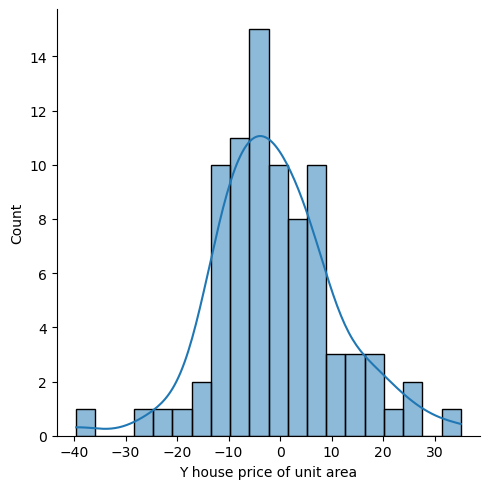

In [42]:
sns.displot(test_residuals, bins=20, kde=True)

From this plot, we can observe that most of the prediction errors fall within -10 and 10 and the model is slightly biased for under-predicting.

In [43]:
print(f'Error mean = {test_residuals.mean()} std = {test_residuals.std()}')

Error mean = -0.9198819230614494 std = 11.881543177738147


LR model fit using 'X4 # of convenience stores' feature.

In [44]:
# using X4 # of convenience stores
cs_train = X_train[['X4 number of convenience stores']]
cs_test = X_test[['X4 number of convenience stores']]

cs_model = LinearRegression()

cs_model.fit(cs_train, y_train)
y_pred = cs_model.predict(cs_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 9.778937734031274


LR model fit using 'X6 longitude' feature.

In [45]:
# using X6 longitude
cs_train = X_train[['X6 longitude']]
cs_test = X_test[['X6 longitude']]

cs_model = LinearRegression()

cs_model.fit(cs_train, y_train)
y_pred = cs_model.predict(cs_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 10.962118045619741


## Multi-Feature Linear Regression

See if using multiple feautures improves the results.
Fitting a hyper-plane to the data instead of a line.

In [46]:
# instantiating the model
full_model = LinearRegression()

# fitting to the data
full_model.fit(X_train, y_train)

# predicting on the test data
y_pred = full_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 7.953757018395303


The model makes better predictions when using all features.

In [47]:
# see how the errors are distributed
test_residuals = y_test - y_pred

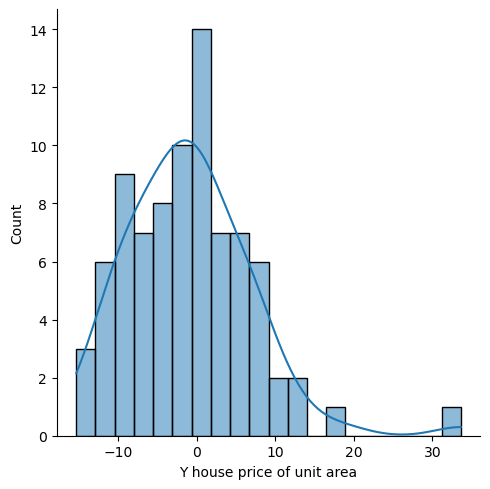

In [48]:
sns.displot(test_residuals, bins=20, kde=True)

The model is slightly biased to under-predicting, but the errors are more evenly distributed and fall within a smaller range.

In [49]:
print(f"Error mean = {test_residuals.mean()} std = {test_residuals.std()}")

Error mean = -1.023204981193063 std = 7.93561752307905


In [50]:
# feature coefficients
pd.DataFrame(full_model.coef_, X.columns, columns=['Coefficients'])

Coefficients
X1 transaction date                         5.885939
X2 house age                               -0.263677
X3 distance to the nearest MRT station     -0.004593
X4 number of convenience stores             0.964538
X5 latitude                               249.530124
X6 longitude                              -32.745818

Create a modified training set by removing the X3 feature

In [52]:
ex2_train = X_train.drop("X3 distance to the nearest MRT station", axis=1)
ex2_test = X_test.drop("X3 distance to the nearest MRT station", axis=1)

# instatiate the model
ex2_model = LinearRegression()

# fitting to the data
ex2_model.fit(ex2_train, y_train)

# predict on the test data
y_pred = ex2_model.predict(ex2_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 8.422325416457207


Residual distribution.

Error mean = -0.9672002535274269 std = 8.417466882223518


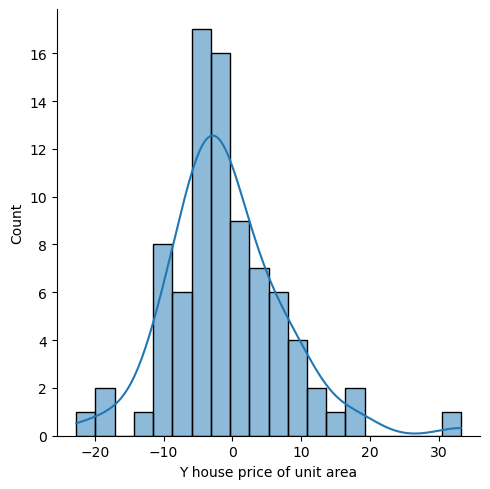

In [53]:
test_residuals = y_test - y_pred
print(f"Error mean = {test_residuals.mean()} std = {test_residuals.std()}")
sns.displot(test_residuals, bins=20, kde=True)

In [54]:
# print the feature coefficients
pd.DataFrame(ex2_model.coef_, ex2_train.columns, columns=["Coefficients"])

Coefficients
X1 transaction date                  4.967428
X2 house age                        -0.277490
X4 number of convenience stores      1.344491
X5 latitude                        383.136882
X6 longitude                       193.821294

## Feature Selection via L1 Regularization

L1 (Lasso) regularization tends to make the coefficients of irrelevant features zero.

In [55]:
from sklearn.linear_model import Lasso

In [56]:
# default alpha = 1
l1_model = Lasso()

# fitting to the data
l1_model.fit(X_train, y_train)

# predicting on the test data
y_pred = l1_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 8.159628353459478


The results are slighlty worse than before, view the feature coefficients.

In [57]:
pd.DataFrame(l1_model.coef_, X.columns, columns=['Coefficients'])

Coefficients
X1 transaction date                         0.000000
X2 house age                               -0.234435
X3 distance to the nearest MRT station     -0.005703
X4 number of convenience stores             0.968305
X5 latitude                                 0.000000
X6 longitude                               -0.000000

## Hyper-Parameter Tuning

Create a validation set from the training set so that is can be used for hyper-parameter tuning.

In [60]:
# Using distinct identifiers to not loose the reference to the full training set
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)
print(f'New X train shape = {X_train_new.shape}')
print(f'X val shape = {X_val.shape}')

New X train shape = (264, 6)
X val shape = (67, 6)


In [62]:
# try a different value for the Lasso hyperparameter
l1_model = Lasso(alpha=0.1)

# fitting to the data
l1_model.fit(X_train_new, y_train_new)

# predicting on the validation data
y_pred = l1_model.predict(X_val)

rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(f"RMSE on val = {rmse}")

RMSE on val = 7.15989686934465


Reduced the error, see how the model works on the test data

In [63]:
# predicting on the test data
y_pred = l1_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE on test = {rmse}")

RMSE on test = 7.944032994437958


Choose another value for alpha

In [64]:
ex3_model = Lasso(alpha=10)

# fitting to the data
ex3_model.fit(X_train_new, y_train_new)

# predicting on the validation data
y_pred = ex3_model.predict(X_val)

rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(f"RMSE on val = {rmse}")

# predicting on the test data
y_pred = ex3_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE on test = {rmse}")

RMSE on val = 7.441464136227748
RMSE on test = 9.05237926984208


Using alpha=10 decreases the performance in both validation adn test data

## Cross-Validation Tuning

sklearn provides a model to automatically test a large number of hyper-parameter values and test valueas across distinct train/val splits through cross-validation.

In [65]:
from sklearn.linear_model import LassoCV

In [66]:
# eps determines the range of values to test (alpha_min / alpha_max = eps)
l1cv_model = LassoCV(eps=0.000001)

In [67]:
# fitting to the data, notice you can use the full training set here as the CV is done automatically
l1cv_model.fit(X_train, y_train)

# predicting on the test data
y_pred = l1cv_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 7.837215873178714


Obtained a lower RMSE and the best-performing hyper-parameter value has been automatically obtained for us.

In [68]:
print(f"Optimal L1 hyper-parameter value = {l1cv_model.alpha_}")

Optimal L1 hyper-parameter value = 0.011400232999228184


In [69]:
# feature coefficients
pd.DataFrame(l1cv_model.coef_, X.columns, columns=['Coefficients'])

Coefficients
X1 transaction date                         5.894141
X2 house age                               -0.254627
X3 distance to the nearest MRT station     -0.004902
X4 number of convenience stores             1.047183
X5 latitude                               123.996987
X6 longitude                               -0.000000

# L2 Regularization

In [70]:
from sklearn.linear_model import RidgeCV

In [71]:
l2cv_model = RidgeCV(alphas=(0.01, 0.1, 1, 10, 100))

In [72]:
# fitting to the data, ise the full training set here as the CV is done automatically
l2cv_model.fit(X_train, y_train)

# predicting on the test data
y_pred = l2cv_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 7.878715486142653


Similar performance

In [73]:
print(f"Optimal L2 hyper-parameter value = {l2cv_model.alpha_}")

Optimal L2 hyper-parameter value = 0.01


In [74]:
pd.DataFrame(l2cv_model.coef_, X.columns, columns=['Coefficients'])

Coefficients
X1 transaction date                         5.989590
X2 house age                               -0.259609
X3 distance to the nearest MRT station     -0.004913
X4 number of convenience stores             1.003507
X5 latitude                               185.314434
X6 longitude                              -31.877312

## Elastic-Net Regularization

Elastic-net combines both L1 and L2 regularizations

In [75]:
from sklearn.linear_model import ElasticNetCV

In [76]:
en_model = ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 0.95, 0.99, 1], eps=0.000001)

In [77]:
# fitting to the data, use the full training set here as the CV is done automatically
en_model.fit(X_train, y_train)

# predicting on the test data
y_pred = en_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 7.837215873178714


In [78]:
print(f"Optimal L1 hyper-parameter value = {en_model.alpha_}")

Optimal L1 hyper-parameter value = 0.011400232999228184


In [79]:
en_model.l1_ratio_

1.0

For this dataset and split, the Elastic-Net model basically reverts to Lasso regularization.

## Polynomial Regression

Polynomial regression can provide extra flexibility to an ordinary linear regression model but increases the risk of over-fitting.

<Axes: >

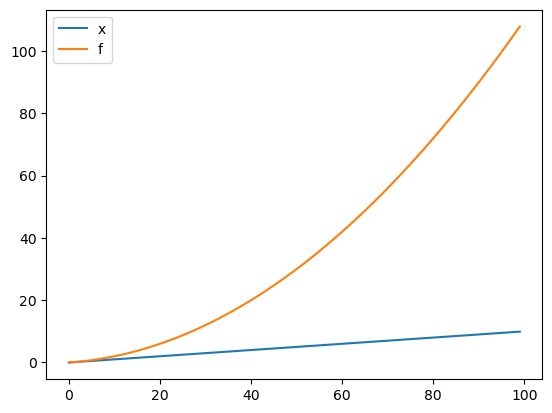

In [80]:
x = np.arange(0,10,.1)
x = pd.DataFrame(x, columns=['x'])
x['f'] = x['x'].apply(lambda v: v + v ** 2)
x.plot()

In [82]:
from sklearn.preprocessing import PolynomialFeatures

In [83]:
# using only second features
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

In [84]:
# selecting just 2 features from the dataset: X5 and X6
train_subset = housing_df[['X5 latitude', 'X6 longitude']]

In [85]:
# fitting the converter to the data
polynomial_converter.fit(train_subset)

PolynomialFeatures(include_bias=False)

In [86]:
# create the polynomial features
polynomial_features = polynomial_converter.transform(train_subset)

Explore the resulting features

In [88]:
# shape of the new training set
print(f"Original dataset shape = {train_subset.shape}")
print(f"New Polynomial dataset shape = {polynomial_features.shape}")

Original dataset shape = (414, 2)
New Polynomial dataset shape = (414, 5)


The polynomial dataset has 3 extra second-order features: $X5^2, X5X6, X6^2$ 

Use the new polynomial features to create a polynomial regression model

In [90]:
# create the train/test split
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.2, random_state=12345)
print(f"X train shape = {X_train.shape}")
print(f"X test shape = {X_test.shape}")

X train shape = (331, 5)
X test shape = (83, 5)


In [91]:
# instantiating the model
poly_model = LinearRegression()

# fitting to the data
poly_model.fit(X_train, y_train)

# predicting on the test data
y_pred = poly_model.predict(X_test)

rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

RMSE = 9.026915393768043


Creating a polynomial regression model has more to do with feature preprocessing than actually modifying the standard LR model.

Third-degree polynomial regression model for all non-categorical features in the housing dataset.

In [92]:
polynomial_converter = PolynomialFeatures(degree=3, include_bias = False)

#Should transaction date be included?
train_subset = housing_df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 
                           'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

#Creating polynomial features
polynomial_converter.fit(train_subset)
polynomial_features = polynomial_converter.transform(train_subset)
print(f"Original dataset shape = {train_subset.shape}")
print(f"New polynomial dataset shape = {polynomial_features.shape}")

#Split
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size = 0.2, random_state=12345)

#Instantiating the model
poly_model = LinearRegression()

#Fitting to the data
poly_model.fit(X_train, y_train)

#Predicting on the test data
y_pred = poly_model.predict(X_test)

#Evaluation
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print(f"RMSE = {rmse}")

Original dataset shape = (414, 6)
New polynomial dataset shape = (414, 83)
RMSE = 13.134385373511021
